<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

Este taller guiado tiene como objetivo mostrar la implementación del algoritmo de Machine Learning Random Forest usando scikitlearn. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* Entrenar y evaluar un modelo de regresión creado con Random Forest


## **1. Importar librería sklearn**

In [ ]:
!pip install -U scikit-learn

In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.11.12
NumPy 2.0.2
Pandas 2.2.2
Matplotlib 3.10.0
Scikit-learn 1.6.1


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 1.0

## **2. Cargar datos**

In [ ]:
housing = pd.read_csv("https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Housing.csv")

## **3. Exploración**

### Resumen

El dataset housing está conformado por 13 variables y 545 observaciones. En este dataset se resumen algunas características de viviendas y el precio de las viviendas.

|Variable|Descripción|Tipología|
|---|---|---|
|price| Precio (USD)|Cuantitativa continua|
|area|Área del predio (pies cuadrados)|Cuantitativa continua|
|bedrooms|Cantidad de habitaciones|Cuantitativa discreta|
|bathrooms|Cantidad de baños|Cuantitativa discreta|
|stories|Cantidad de pisos-niveles|Cuantitativa discreta|
|mainroad|Ubicación sobre una calle principal|Cualitativa binaria|
|guestroom|Cuarto para invitados|Cualitativa binaria|
|basement|Sotano|Cualitativa binaria|
|hotwaterheating|Calentador de agua|Cualitativa binaria|
|airconditioning|Aire acondicionado|Cualitativa binaria|
|parking|Cantidad de parqueaderos|Cuantitativa discreta|
|prefarea|Barrio o zona privilegiada de la ciudad|Cualitativa binaria|
|furnishing status|Estado de amoblamiento|Cualitativa ordinal|

In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
housing.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


* Análisis de correlación

Por ahora trabajamos solo con las variables númericas

In [ ]:
housing.select_dtypes(['int', 'float']).corrwith(housing['price'], method='pearson').sort_values(ascending = [False])

,0
price,1.000000
area,0.535997
bathrooms,0.517545
stories,0.420712
parking,0.384394
bedrooms,0.366494


## **4. Transformación de variables**

In [ ]:
pd.set_option("future.no_silent_downcasting", True)

In [ ]:
housing_transformado = housing.replace({'yes':1, 'no':0}).copy()
housing_transformado.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [ ]:
enc = OneHotEncoder(handle_unknown='error')

enc.fit(housing_transformado['furnishingstatus'].values.reshape(-1,1)) #.values.reshape(-1,1)

enc.categories_

[array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]

In [ ]:
mis_variables = enc.transform(housing_transformado['furnishingstatus'].values.reshape(-1,1)).toarray()

df_codificaciones = pd.DataFrame(mis_variables, columns = enc.categories_[0])
df_codificaciones.head(2)

,furnished,semi-furnished,unfurnished
0,1.0,0.0,0.0
1,1.0,0.0,0.0


In [ ]:
housing_transformado_2 =  (housing_transformado
                           .merge(df_codificaciones
                                  ,how='left'
                                  ,left_index=True
                                  ,right_index=True
                                  )
                           .drop(['furnishingstatus'], axis=1)
                           )

housing_transformado_2.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0


In [ ]:
housing_transformado_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    object 
 6   guestroom        545 non-null    object 
 7   basement         545 non-null    object 
 8   hotwaterheating  545 non-null    object 
 9   airconditioning  545 non-null    object 
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    object 
 12  furnished        545 non-null    float64
 13  semi-furnished   545 non-null    float64
 14  unfurnished      545 non-null    float64
dtypes: float64(3), int64(6), object(6)
memory usage: 64.0+ KB


In [ ]:
# Creamos una lista con columnas que aún son de tipo texto
columnas_a_numeros = housing_transformado_2.select_dtypes('object').columns

# Transformarlas a tipo int (entero)
for col in columnas_a_numeros:
  housing_transformado_2[col] = housing_transformado_2[col].astype(int) #.to_numeric(revisar parametros)

# housing_transformado_2['guestroom'].astype(int)
housing_transformado_2.info() #['mainroad'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  furnished        545 non-null    float64
 13  semi-furnished   545 non-null    float64
 14  unfurnished      545 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 64.0 KB


In [ ]:
(housing_transformado_2
 .select_dtypes('number')
 .corrwith(housing_transformado_2['price'], method='pearson')
 .sort_values(ascending = [False])
 )

,0
price,1.000000
area,0.535997
bathrooms,0.517545
airconditioning,0.452954
stories,0.420712
parking,0.384394
bedrooms,0.366494
prefarea,0.329777
mainroad,0.296898
guestroom,0.255517


In [ ]:
# Se divide entre variables predictoras y objetivo
# Quitamos la variable precio para obtener el conjunto de variables predictoras

X = housing_transformado_2.drop(['price'], axis=1) #[features_in]
y = housing_transformado_2['price']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (545, 14)
Dimensiones de y: (545,)


## **5. Partición del dataset en entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,                #primero pasamos los datos
    test_size = 0.2,    # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 20~30%
    random_state = 11   # Semilla aleatoria que sirve para reproducibilidad
)

In [ ]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (436, 14)
Dimensiones de y de entrenamiento: (436,)

Dimensiones de X de prueba: (109, 14)
Dimensiones de y de prueba: (109,)


## **6. Modelamiento**

* KNN (Vecinos más cercanos | K Nearest Neighbours)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:

# from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Note que importamos el clasificador para resolver un problema de clasificación, cabe destacar que también existe su contraparte de regresión

# Creamos un objeto que va a contener toda la información del modelo, en este caso le pasamos el hiperparametro número de vecinos (n_neighbors)
reg = KNeighborsRegressor(n_neighbors = 11)

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
reg.fit(X_train_scaled, y_train)

print('Ya hemos entrenado nuestro primer modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos')
print(type(reg))

Ya hemos entrenado nuestro primer modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [ ]:
# Realizamos predicciones usando el modelo forest que hemos entrenado tanto para l partición de entrenamiento como par ala de prueba
y_predict_test = reg.predict(X_test_scaled)
y_predict_train = reg.predict(X_train_scaled)

### **Error absoluto medio**

Conocido por sus siglas en inglés MAE (Mean Absolute Error). Es un estimador que mide el promedio de los errores absolutos.

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$$

Donde $y_i$ es el valor real para la i-ésima observación. $\hat{y}_i$ es el valor predicho por el módelo para i-ésima observación.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, y_predict_test)
print('MAE en prueba: {:2f}'.format(round(mae_test,2)))


mae_train = mean_absolute_error(y_train, y_predict_train)
print('MAE en entrenamiento: {:2f}'.format(round(mae_train,2)))

MAE en prueba: 716973.280000
MAE en entrenamiento: 770065.300000


### **Error cuadrático medio**

Conocido por sus siglas en inglés MSE (Mean Squared Error). Es un estimador que mide el promedio de los errores al cuadrado, es decir, la diferencia entre el valor predicho y el real.

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$$

Donde $y_i$ es el valor real para la i-ésima observación. $\hat{y}_i$ es el valor predicho por el módelo para i-ésima observación.

A menudo se emplea la Raíz del Error Cuadrático Medio (RMSE) para dar interpretación concorde a las unidades de trabajo.

$$ \text{RMSE}(y, \hat{y}) = \sqrt{\text{MSE}}$$

In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_predict_test)
print('MSE en partición de prueba: {:3f}'.format(mse_test))


mse_train = mean_squared_error(y_train, y_predict_train)
print('MSE en partición de entrenamiento: {:3f}'.format(mse_train))




print('\nRMSE en partición de prueba: {:3f}'.format(np.sqrt(mse_test)))
print('RMSE en partición de entrenamiento: {:3f}'.format(np.sqrt(mse_train)))

MSE en partición de prueba: 1108239057704.041260
MSE en partición de entrenamiento: 1188543409627.090820

RMSE en partición de prueba: 1052729.337344
RMSE en partición de entrenamiento: 1090203.379937


### **Coeficiente de determinación $R^{2}$**

El coeficiente de determinación representa la proporción de la varianza de y que ha sido explicado por las variables independientes del modelo. Provee una indicación de que tan bueno fue el ajuste además de indicar que tan bueno será el desempeño de las predicciones con nuevos datos. El mejor valor posible es 1, en el peor de los casos un modelo constante que siempre predice el mismo valor sin imporar el valor de x tendría un score de 0.

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Donde $y_i$ es el valor real para la i-ésima observación. $\hat{y}_i$ es el valor predicho por el módelo para i-ésima observación y $\bar{y}$ es el promedio de los valores observados para y.

In [ ]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_predict_test)
print('Coeficiente de determinación en prueba: {:3f}'.format(r2_test))


r2_train = r2_score(y_train, y_predict_train)
print('Coeficiente de determinación en entrenamiento: {:3f}'.format(r2_train))

Coeficiente de determinación en prueba: 0.631667
Coeficiente de determinación en entrenamiento: 0.669123


In [ ]:
# Cómo encontrar el posible mejor K
rmse_test = []
rmse_train = []

rango_vecinos = range(1,26)

for k in rango_vecinos:
  reg = KNeighborsRegressor(n_neighbors = k) # weights = 'distance', default = 'uniform'
  reg.fit(X_train_scaled, y_train)

  y_predict_test = reg.predict(X_test_scaled)
  y_predict_train = reg.predict(X_train_scaled)

  mse_test = mean_squared_error(y_test, y_predict_test)

  mse_train = mean_squared_error(y_train, y_predict_train)

  rmse_test.append(np.sqrt(mse_test))
  rmse_train.append(np.sqrt(mse_train))

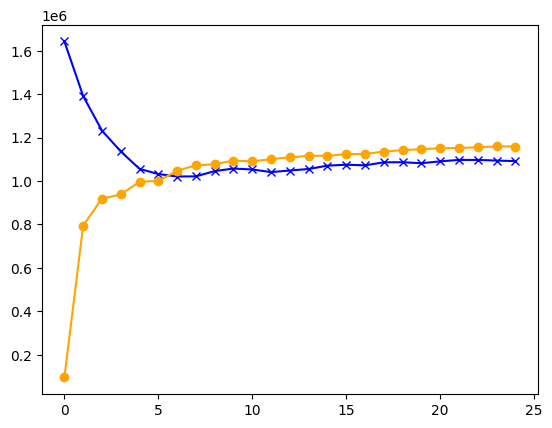

In [ ]:
plt.plot(rmse_test, marker = 'x', color='blue') # Testeo en azul
plt.plot(rmse_train, marker = 'o', color='orange') # Entrenamiento en naranja
plt.show()

* Random Forest

Haremos la regresión utilizando el algoritmo Random Forest discutido en clase.

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Importar el algoritmo de regresión
# from sklearn.ensemble import RandomForestClassifier

# Crear un objeto que va guardar la información del modelo
forest = RandomForestRegressor(n_estimators=100,           #número de arboles dentro del bosque
                              max_depth=5,                 #aplicar pre-poda para los árboles del bosque
                              criterion = "squared_error", #selección de la función que mide la calidad de la división en cada rama
                              random_state= 11,            #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                              bootstrap=True,               #selección aleatoria de las muestras para construir cada arbol
                              max_samples= int(round(X_train.shape[0]/2,0)), #número máximo de muestras escogidas para cada árbol
                              max_features='sqrt',           #número de variables que se escoge en cada paso de la construcción del árbol de decisión, sqrt usa la raiz cuadrada del numero de caracteristicas n_features
                              oob_score=True                 #usar o no out of bag samples para evaluar el modelo, Bagging
                               )
# error oob - out of bag
# RandomGridSearch GridSearch
# Ajustar el modelo con los datos de entrenamiento - aprendizaje

forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', max_samples=218,
                      oob_score=True, random_state=11)

## **7. Evaluación del desempeño del modelo**

In [ ]:
# Realizamos predicciones usando el modelo forest que hemos entrenado tanto para l partición de entrenamiento como par ala de prueba
y_predict_test = forest.predict(X_test)
y_predict_train = forest.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_predict_test)
print('MSE en partición de prueba: {:3f}'.format(mse_test))


mse_train = mean_squared_error(y_train, y_predict_train)
print('MSE en partición de entrenamiento: {:3f}'.format(mse_train))


print('\nRMSE en partición de prueba: {:3f}'.format(np.sqrt(mse_test)))
print('RMSE en partición de entrenamiento: {:3f}'.format(np.sqrt(mse_train)))

MSE en partición de prueba: 1208113617529.524902
MSE en partición de entrenamiento: 977914741307.190308

RMSE en partición de prueba: 1099142.218973
RMSE en partición de entrenamiento: 988895.718116


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, y_predict_test)
print('Coeficiente de determinación en prueba: {:3f}'.format(mae_test))


mae_train = mean_absolute_error(y_train, y_predict_train)
print('Coeficiente de determinación en entrenamiento: {:3f}'.format(mae_train))

Coeficiente de determinación en prueba: 805107.450926
Coeficiente de determinación en entrenamiento: 709250.929451


In [ ]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_predict_test)
print('Coeficiente de determinación en prueba: {:3f}'.format(r2_test))


r2_train = r2_score(y_train, y_predict_train)
print('Coeficiente de determinación en entrenamiento: {:3f}'.format(r2_train))

Coeficiente de determinación en prueba: 0.598473
Coeficiente de determinación en entrenamiento: 0.727760


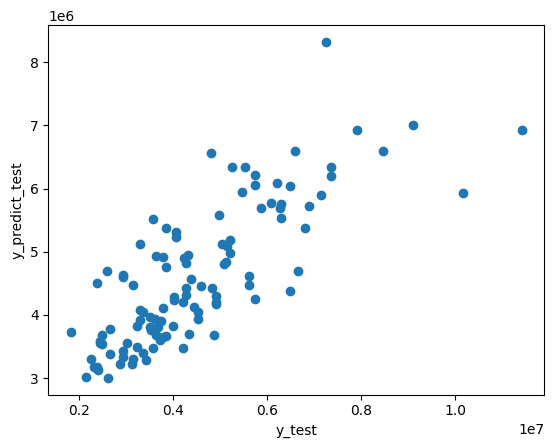

In [ ]:
plt.scatter(y_test, y_predict_test)
plt.xlabel('y_test')
plt.ylabel('y_predict_test')
plt.show()

A continuación se muestran algunos atributos importantes del objeto forest.

In [ ]:
# Importancia de las caracteristicas usadas para crear el modelo
importances = forest.feature_importances_

print('Importancia de características\n\n{}'.format(importances))
print(np.sum(importances))

Importancia de características

[0.26263862 0.0684949  0.17953011 0.09394221 0.02950139 0.02422476
 0.02946341 0.01652033 0.09605739 0.09058108 0.05206591 0.0202838
 0.01474939 0.02194669]
1.0


Text(0, 0.5, 'Características')

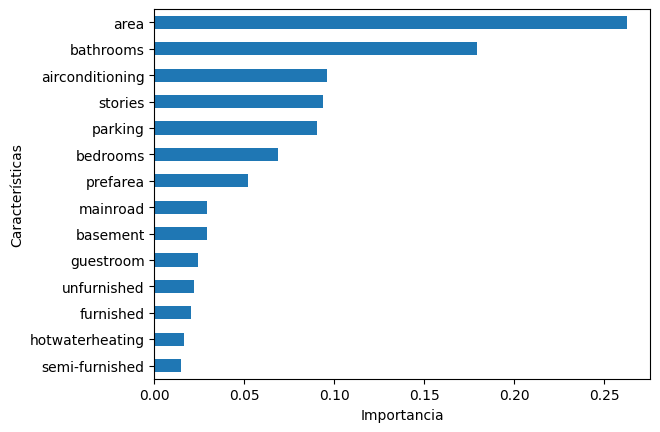

In [ ]:
feature_names = X_train.columns

importancia_1 = pd.Series(data = importances, index = feature_names)

importancia_1.sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Importancia')
plt.ylabel('Características')

## **8. Busqueda de hiperparámetros**

Vamos a experimentar con la cantidad de arboles presentes en el bosque, se aconseja usar escala exponencial en base 10. Usaremos el ciclo for para que recorra la tupla con los valores que deseamos y se los daremos como hiperparámetro al algoritmo.

In [ ]:
# Se crea una lista vacia que va a almacenar las métricas durante el experimento
mse = []

for arboles in (10,100,1000,10000):

  # Crear un objeto que va guardar la información del modelo
  forest = RandomForestRegressor(n_estimators=arboles, #número de arboles dentro del bosque
                                max_depth=5, #aplicar pre-poda para los árboles del bosque
                                criterion = "squared_error", #selección de la función que mide la calidad de la división en cada rama
                                random_state= 11, #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                                bootstrap=True, #selección aleatoria de las muestras para construir cada arbol
                                max_samples= X_train.shape[0], #número máximo de muestras escogidas para cada árbol
                                max_features='sqrt', #número de variables que se escoge en cada paso de la construcción del árbol de decisión, sqrt usa la raiz cuadrada del numero de caracteristicas n_features
                                oob_score=True #usar o no out of bag samples para evaluar el modelo, Bagging
                                )

  # Se entrena el modelo con los datos de entrenamiento
  forest.fit(X_train,y_train)

  # Se hace una predicción a partir del conjunto de prueba
  y_pred = forest.predict(X_test)

  # Se calcula el mse para esa configuración
  a = mean_squared_error(y_test,y_pred)

  # Se guarda el resultado del mse en una lista llamada mse
  mse.append(a)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Se puede observar que 10.000 es un buen número de árboles, hay una mejor importante respecto a 100 y muy poca perdida en comparación a 1000.000 donde el costo computacional es muy alto.

Text(0, 0.5, 'Error cuadrático medio')

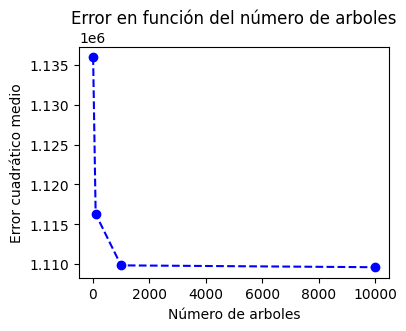

In [ ]:
mse = [np.sqrt(i) for i in mse]
numero_arboles = [10,100,1000,10000]

fig = plt.figure(dpi = 100, figsize=(4,3))
plt.plot(numero_arboles,mse, marker = 'o',linestyle = '--', color = 'b')

plt.title('Error en función del número de arboles')
plt.xlabel('Número de arboles')
plt.ylabel('Error cuadrático medio')


Por último vamos a experimentar con la profundidad del bosque. Para asegurar que el entrenamiento sea más rápido vamos a quedarnos con 1000 arboles. Este experimento solo tarda 1 minuto y 45 segundos en ejecutarse.

In [ ]:
# Se crea una lista vacia que va a almacenar las métricas durante el experimento
mse_train = []
mse_test = []

r2_train = []
r2_test = []

for profundidad in (3,5,10,15,20,25):


  # Se crea la variable que contiene la información del modelo y se escogen los hiperparámetros
  forest = RandomForestRegressor(n_estimators = 1000, #número de arboles dentro del bosque
                              max_depth = profundidad, #aplicar pre-poda para los árboles del bosque
                              random_state= 0, #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                              max_samples= X_train.shape[0], #número máximo de muestras escogidas para cada árbol
                               criterion="squared_error", #selección de la función que mide la calidad de la división en cada rama
                              max_features='sqrt', #número de variables que se escoge en cada paso de la construcción del árbol de decisión, sqrt usa la raiz cuadrada del numero de caracteristicas n_features
                              bootstrap=True) #selección aleatoria de las muestras para construir cada arbol


  # Se entrena el modelo con los datos de entrenamiento
  forest.fit(X_train,y_train)

  # Se hace una predicción a partir del conjunto de prueba
  y_pred = forest.predict(X_test)
  y_pred2 = forest.predict(X_train)

  # Se calcula el mse y el r2 para esa configuración y se almacena
  mse_test.append(mean_squared_error(y_test,y_pred))
  r2_test.append(r2_score(y_test,y_pred))

  mse_train.append(mean_squared_error(y_train,y_pred2))
  r2_train.append(r2_score(y_train,y_pred2))

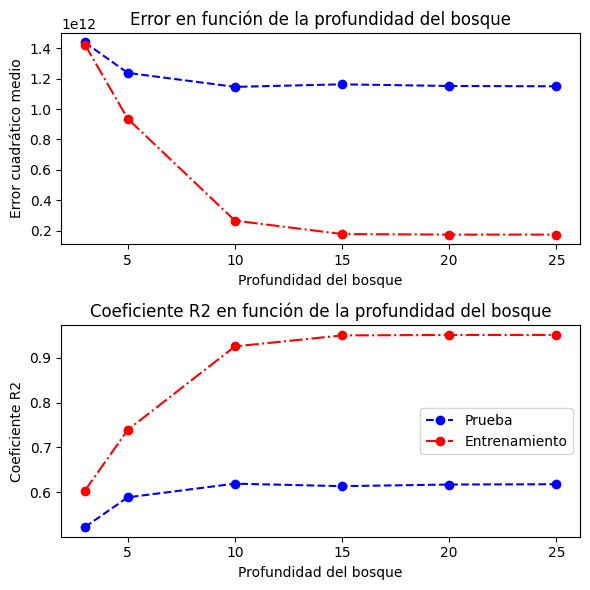

In [ ]:
#@title Dé click solo para ver como fue creada la visualización
profundidad = (3,5,10,15,20,25)

# Definición del canva con 2 gráficas apiladas
fig,axes = plt.subplots(2,1,dpi = 100, figsize=(6,6))

# Gráfica superior
axes[0].plot(profundidad,mse_test, marker = 'o',linestyle = '--', color = 'b')
axes[0].plot(profundidad,mse_train, marker = 'o',linestyle = '-.', color = 'r')

axes[0].set_title('Error en función de la profundidad del bosque')
axes[0].set_xlabel('Profundidad del bosque')
axes[0].set_ylabel('Error cuadrático medio')

# Gráfica inferior
axes[1].plot(profundidad,r2_test, marker = 'o',linestyle = '--', color = 'b')
axes[1].plot(profundidad,r2_train, marker = 'o',linestyle = '-.', color = 'r')


axes[1].set_title('Coeficiente R2 en función de la profundidad del bosque')
axes[1].set_xlabel('Profundidad del bosque')
axes[1].set_ylabel('Coeficiente R2')

# Ubicación de la leyenda
plt.legend(["Prueba", "Entrenamiento"], loc ="center right")

# Evita que los elementos se sobrelapen
plt.tight_layout()

Ahora, entrenemos el model óptimo de acuerdo a nuestra experimentación previa. Usaremos 10.000 árboles y profundidad máxima de 15. El entrenamiento de este modelo tarda solamente 3 minutos y 27 segundos.

In [ ]:
import time

# Crear un objeto que va guardar la información del modelo
forest = RandomForestRegressor(n_estimators=10000, #número de arboles dentro del bosque
                              max_depth=15, #aplicar pre-poda para los árboles del bosque
                              criterion = "squared_error", #selección de la función que mide la calidad de la división en cada rama
                              random_state= 0, #Controla tanto la aleatoriedad del bootstrapping de las muestras utilizadas al construir árboles (si bootstrap=True) como el muestreo de las características a considerar cuando se busca la mejor división en cada nodo
                              bootstrap=True, #selección aleatoria de las muestras para construir cada arbol
                              max_samples= X_train.shape[0], #número máximo de muestras escogidas para cada árbol
                              max_features='sqrt', #número de variables que se escoge en cada paso de la construcción del árbol de decisión, sqrt usa la raiz cuadrada del numero de caracteristicas n_features
                              oob_score=True #usar o no out of bag samples para evaluar el modelo, Bagging
                               )
# error oob - out of bag

# Ajustar el modelo con los datos de entrenamiento - aprendizaje
%time forest.fit(X_train,y_train)

CPU times: user 25.2 s, sys: 602 ms, total: 25.8 s
Wall time: 26.9 s


RandomForestRegressor(max_depth=15, max_features='sqrt', max_samples=436,
                      n_estimators=10000, oob_score=True, random_state=0)

In [ ]:
importances = forest.feature_importances_
importances

array([0.28735757, 0.0636882 , 0.14829409, 0.09113831, 0.02344713,
       0.02841433, 0.03323188, 0.01700489, 0.08775679, 0.09931488,
       0.04796773, 0.02149058, 0.01968163, 0.03121199])

Text(0, 0.5, 'Características')

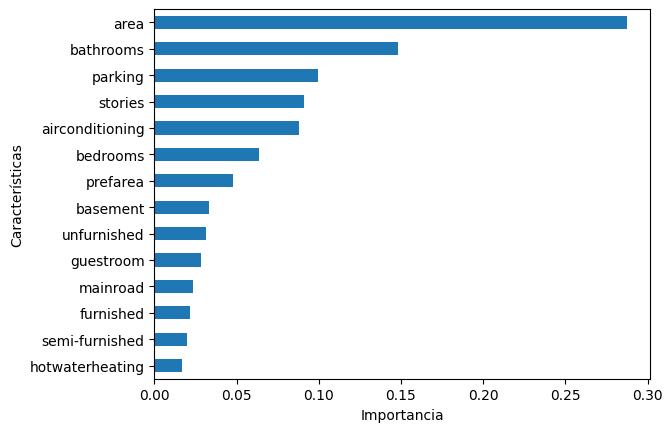

In [ ]:
importancia_2 = pd.Series(data = importances, index = feature_names)
importancia_2.sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Importancia')
plt.ylabel('Características')

### Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
housing_transformado_2.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0


In [ ]:
variables_seleccionadas = ['area', 'stories', 'bathrooms', 'parking', 'bedrooms']

In [ ]:
X = housing_transformado_2[variables_seleccionadas]#.drop(['price'], axis=1)
y = housing_transformado_2['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_predict = reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_predict)
mae

1127483.3523235198

In [ ]:
mse = mean_squared_error(y_test, y_predict)
np.sqrt(mse)

np.float64(1514173.5520492245)

In [ ]:
r2 = r2_score(y_test, y_predict)
r2

0.5464062355495864

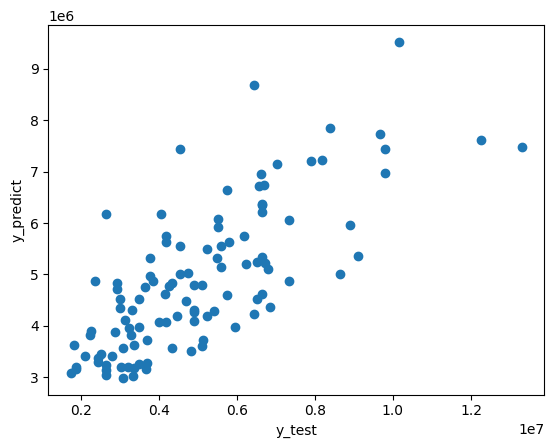

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

In [ ]:
df_checks = X_test.copy()
df_checks['price'] = y_test
df_checks['price_predict'] = y_predict
df_checks['error'] = np.abs(df_checks['price'] - df_checks['price_predict'])


df_checks.sort_values(by=['error'], ascending=False).head()

,area,stories,bathrooms,parking,bedrooms,price,price_predict,error
0,7420,3,2,2,4,13300000,7.480867e+06,5.819133e+06
2,9960,2,2,2,3,12250000,7.619041e+06,4.630959e+06
15,6000,2,1,2,4,9100000,5.361443e+06,3.738557e+06
22,8050,1,1,1,3,8645000,5.010612e+06,3.634388e+06
499,3630,2,3,0,3,2660000,6.174324e+06,3.514324e+06


<Axes: ylabel='Frequency'>

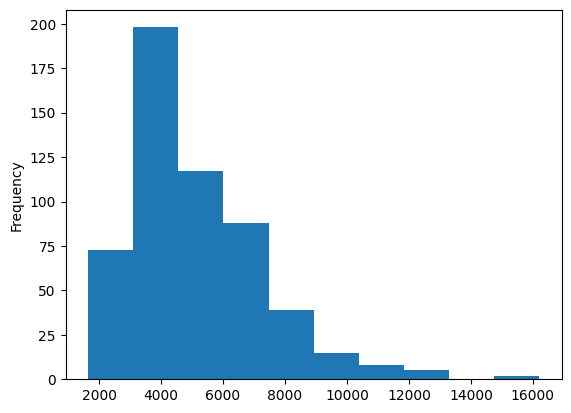

In [ ]:
housing['area'].plot(kind='hist')

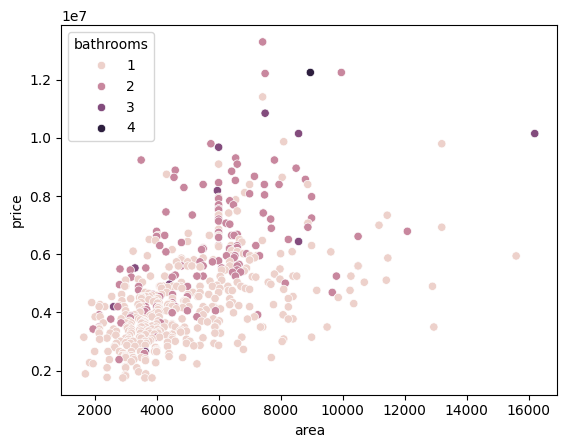

In [ ]:
df_intentos = housing_transformado_2[variables_seleccionadas+['price']]
sns.scatterplot(data=df_intentos, x='area', y='price', hue='bathrooms')
plt.show()

## **Recursos adicionales**

* Artículo métricas de regesión

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

* Documentación métricas de regresión

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

* Documentación random forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* Información adicional

https://christophm.github.io/interpretable-ml-book/tree.html#tree

* Explicación en video del algoritmo Random Forest, subtitulos en español disponibles.

https://youtu.be/J4Wdy0Wc_xQ



## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*